#get_dataset_csv.ipynb
Minimal calls to get the IR1 dataframes and convert to csv files using the loaders for TWristAR and Gesture-Phase-Segmentation datasets.


<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.

[Lee B. Hinkle](https://userweb.cs.txstate.edu/~lbh31/), Texas State University, [IMICS Lab](https://imics.wp.txstate.edu/)  
TODO:



In [1]:
import os
import shutil #https://docs.python.org/3/library/shutil.html
from shutil import unpack_archive # to unzip
import time
import pandas as pd
import numpy as np
import urllib.request # to get files from web w/o !wget

In [2]:
def get_py_file(fname, url):
    """checks for local file, if none downloads from URL.    
    :return: nothing"""
    #fname = 'load_data_utils.py'
    #ffname = os.path.join(my_dir,fname)
    if (os.path.exists(fname)):
        print ("Local",fname, "found, skipping download")
    else:
        print("Downloading",fname, "from IMICS git repo")
        urllib.request.urlretrieve(url, filename=fname)

get_py_file(fname = 'load_data_utils.py', url = 'https://raw.githubusercontent.com/imics-lab/load_data_time_series/main/load_data_utils.py')
get_py_file(fname = 'load_data_transforms.py', url = 'https://raw.githubusercontent.com/imics-lab/load_data_time_series/main/load_data_transforms.py')
get_py_file(fname = 'twristar_load_dataset.py', url = 'https://raw.githubusercontent.com/imics-lab/load_data_time_series/main/HAR/TWristAR/twristar_load_dataset.py')
get_py_file(fname = 'gesture_phase_segmentation_load_dataset.py', url = 'https://raw.githubusercontent.com/imics-lab/load_data_time_series/main/Gesturing_Signing/gesture_phase_segmentation_load_dataset.py')

In [3]:
import load_data_transforms as xform
import load_data_utils as utils
import twristar_load_dataset as twristar
import gesture_phase_segmentation_load_dataset as gps

Local load_data_utils.py found, skipping download
Local load_data_transforms.py found, skipping download
Local load_data_utils.py found, skipping download
Local load_data_transforms.py found, skipping download


Unzipping Gesture Phase Segmentation file in ./gesture_phase_dataset directory
dict_keys(['a1_raw', 'a2_raw', 'a3_raw', 'b1_raw', 'b3_raw', 'c1_raw', 'c3_raw'])
Labels {'Rest': 0, 'Preparation': 1, 'Stroke': 2, 'Hold': 3, 'Retraction': 4}


array([<AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>],
      dtype=object)

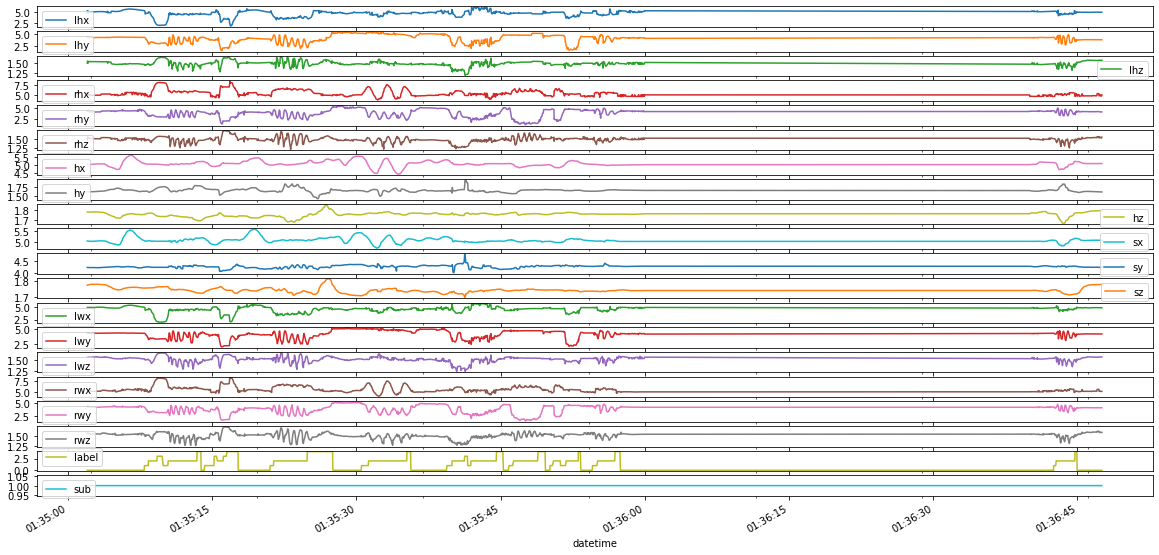

In [4]:
ir1_dict = gps.get_gps_ir1_dict()
print(ir1_dict.keys()) # this is the name of the raw data file/IR1 dataframes
print("Labels",gps.label_map_gps['label'])
my_df = ir1_dict['a1_raw'] # change key to get other files
# convert dataframe categorical strings to ints per label mapping dict (so they can be plotted and take less room)
my_df = xform.assign_ints_ir1_labels(my_df, label_mapping_dict = gps.label_map_gps)
my_df.plot(subplots=True, figsize=(20, 10))

Unzipping TWristAR file in . directory
dict_keys(['1574621345_A01F11', '1574622389_A01F11', '1574624998_A01F11', '1633107019_A01F11', '1633108344_A01F11', '1633109744_A01F11', '1633704587_A01F11', '1633705664_A01F11', '1633711821_A01F11'])
Labels {'Downstairs': 0, 'Jogging': 1, 'Sitting': 2, 'Standing': 3, 'Upstairs': 4, 'Walking': 5, 'Undefined': 99}


array([<AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>],
      dtype=object)

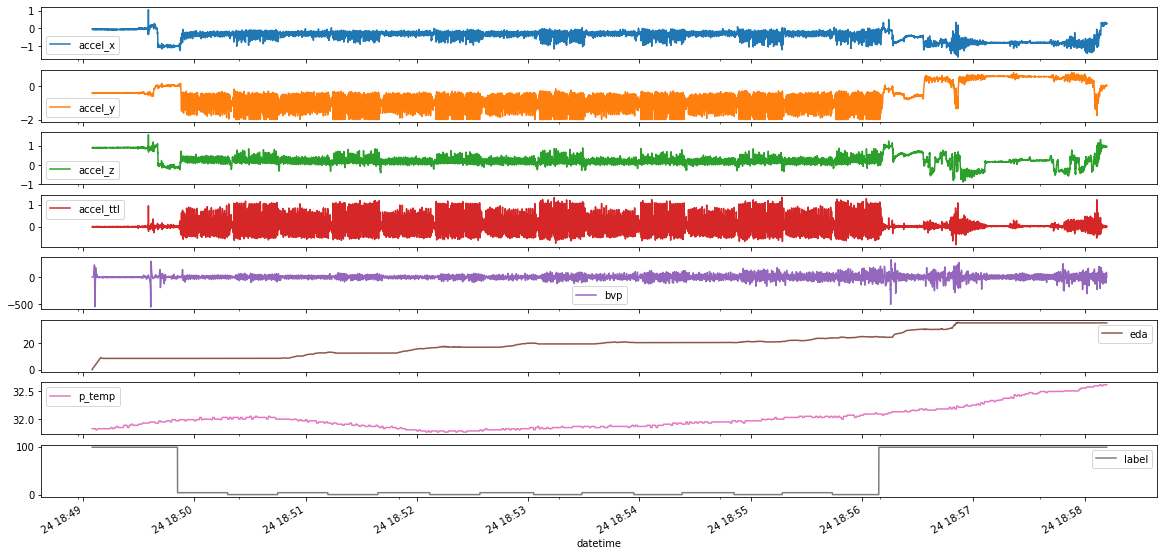

In [5]:
ir1_dict = twristar.get_twristar_ir1_dict()
print(ir1_dict.keys()) # this is the name of the raw data file/IR1 dataframes
print("Labels",twristar.label_map_twristar['label'])
my_df = ir1_dict['1574621345_A01F11'] # change key to get other files
# convert dataframe categorical strings to ints per label mapping dict (so they can be plotted and take less room)
my_df = xform.assign_ints_ir1_labels(my_df, label_mapping_dict = twristar.label_map_twristar)
my_df.plot(subplots=True, figsize=(20, 10))

dict_keys(['1574625540_A01F11', '1633111849_A01F11'])
Labels {'Downstairs': 0, 'Jogging': 1, 'Sitting': 2, 'Standing': 3, 'Upstairs': 4, 'Walking': 5, 'Undefined': 99}


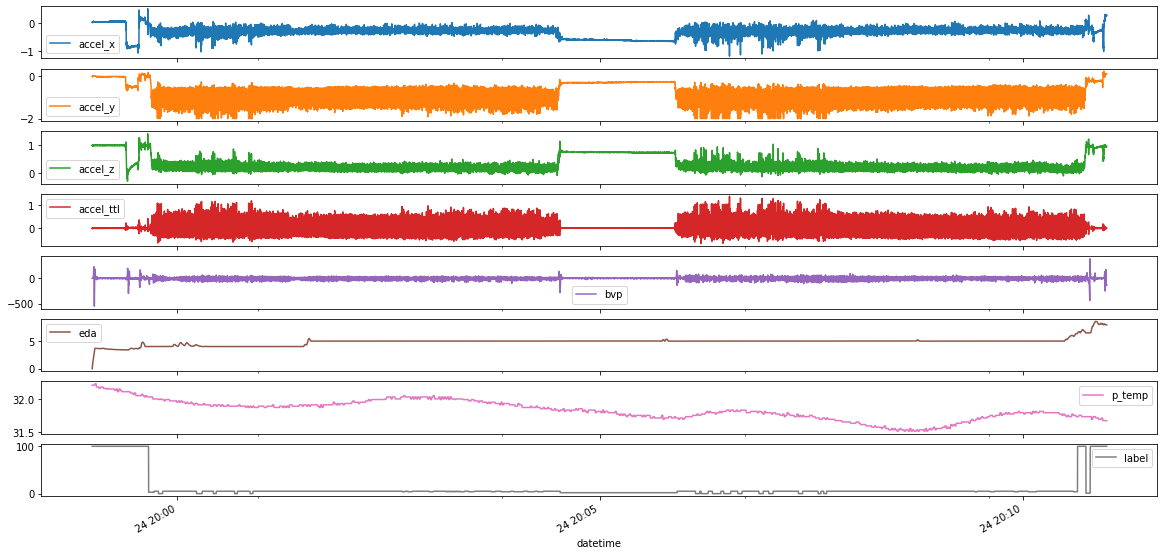

In [8]:
twristar.scripted = False # get the free-form walks
ir1_dict = twristar.get_twristar_ir1_dict()
print(ir1_dict.keys()) # this is the name of the raw data file/IR1 dataframes
print("Labels",twristar.label_map_twristar['label'])
my_df = ir1_dict['1574625540_A01F11'] # change key to get other files
# convert dataframe categorical strings to ints per label mapping dict (so they can be plotted and take less room)
my_df = xform.assign_ints_ir1_labels(my_df, label_mapping_dict = twristar.label_map_twristar)
my_df.plot(subplots=True, figsize=(20, 10))
twristar.scripted = True # back to original value

In [12]:
# save as .csv
my_df.to_csv('1574625540_A01F11.csv')
# and as a zip - csv is 2.2MB, zip is 323KB so worth it just for download time
compression_opts = dict(method='zip',
                        archive_name='1574625540_A01F11.csv')  
my_df.to_csv('1574625540_A01F11.zip', compression=compression_opts)

In [9]:
# Download a video
vid_fname = 'sub1_long_walk.mp4'
vid_url = 'https://zenodo.org/record/5911808/files/'+vid_fname+'?download=1'
print(vid_url) 
urllib.request.urlretrieve(vid_url, vid_fname)

https://zenodo.org/record/5911808/files/sub1_long_walk.mp4?download=1


('sub1_long_walk.mp4', <http.client.HTTPMessage at 0x7fa86ca60df0>)

In [14]:
# this displays the video but doesn't seem to advance unless you click slider
# ref https://stackoverflow.com/questions/57377185/how-play-mp4-video-in-google-colab
from IPython.display import HTML
HTML(f"""<video src={vid_url} width=500 controls/>""")